In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScler
from matplotlib import pyplot as plt
%matplotlib inline


ImportError: cannot import name 'MinMaxScler' from 'sklearn.preprocessing' (C:\Users\abuba\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [12]:
import pandas as pd
df = pd.read_csv("E:\\Downloads\\income.csv")
df

,ID,Income,Age,Education,Gender
0,1,113,69,12,1
1,2,91,52,18,0
2,3,121,65,14,0
3,4,81,58,12,0
4,5,68,31,16,1
...,...,...,...,...,...
1495,1496,84,50,16,0
1496,1497,81,40,16,0
1497,1498,62,30,16,1
1498,1499,99,67,16,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# income_level scale
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

# Age scale
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,ID,Income,Age,Education,Gender
0,1,0.825000,0.980769,12,1
1,2,0.641667,0.653846,18,0
2,3,0.891667,0.903846,14,0
3,4,0.558333,0.769231,12,0
4,5,0.450000,0.250000,16,1
...,...,...,...,...,...
1495,1496,0.583333,0.615385,16,0
1496,1497,0.558333,0.423077,16,0
1497,1498,0.400000,0.230769,16,1
1498,1499,0.708333,0.942308,16,0


Text(0, 0.5, 'Income')

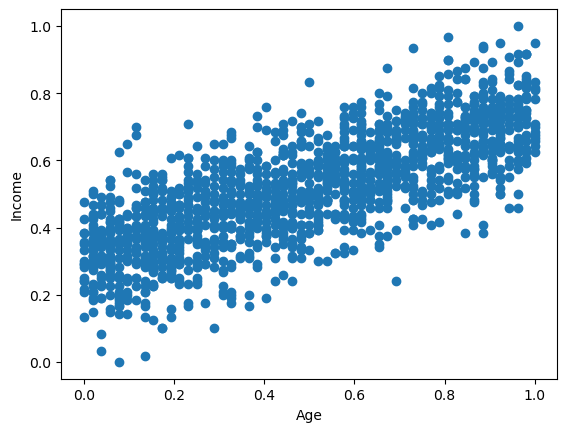

In [16]:
from matplotlib import pyplot as plt
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [17]:
k_range = range(1, 30)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

In [18]:
sse

[169.2267710034517,
 53.23481870532738,
 31.775923424294483,
 24.377341120011042,
 20.82652807796586,
 18.09935227258541,
 16.084433082962793,
 14.008445676981491,
 12.635238571824178,
 10.956510775493962,
 10.409801578772527,
 9.646032842939414,
 8.905978427560456,
 8.483317620443165,
 7.84311648417199,
 7.316623540646207,
 6.98052083666901,
 6.52892979443746,
 6.1428300628761345,
 6.01787763882494,
 5.548179899287549,
 5.235082255257705,
 5.107443836673609,
 4.897868145797981,
 4.775447284714636,
 4.606357130372148,
 4.417553278325112,
 4.2513611145233074,
 4.094593759295919]

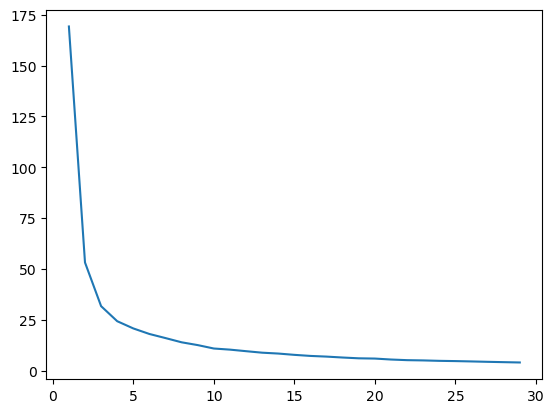

In [20]:
plt.xlabel='k'
plt.ylabel = 'Sum of Squared Error'
plt.plot(k_range,sse)

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=42)
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([3, 1, 3, ..., 0, 3, 1])

In [26]:
df['cluster'] = y_predicted
df

,ID,Income,Age,Education,Gender,cluster
0,1,0.825000,0.980769,12,1,3
1,2,0.641667,0.653846,18,0,1
2,3,0.891667,0.903846,14,0,3
3,4,0.558333,0.769231,12,0,1
4,5,0.450000,0.250000,16,1,0
...,...,...,...,...,...,...
1495,1496,0.583333,0.615385,16,0,1
1496,1497,0.558333,0.423077,16,0,4
1497,1498,0.400000,0.230769,16,1,0
1498,1499,0.708333,0.942308,16,0,3


TypeError: 'str' object is not callable

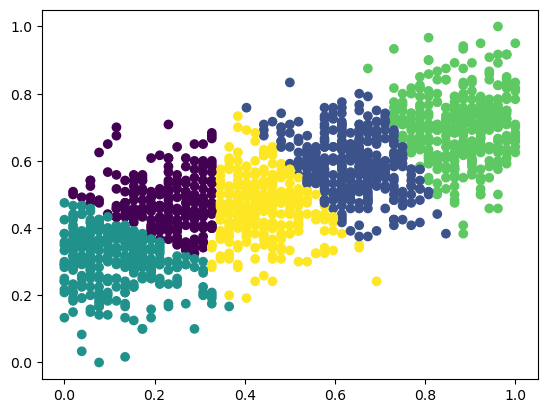

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Income'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering (k=5)')
plt.show()